In [24]:
# ###########################################################################
# Color chart
# Version 0.1
# ###########################################################################

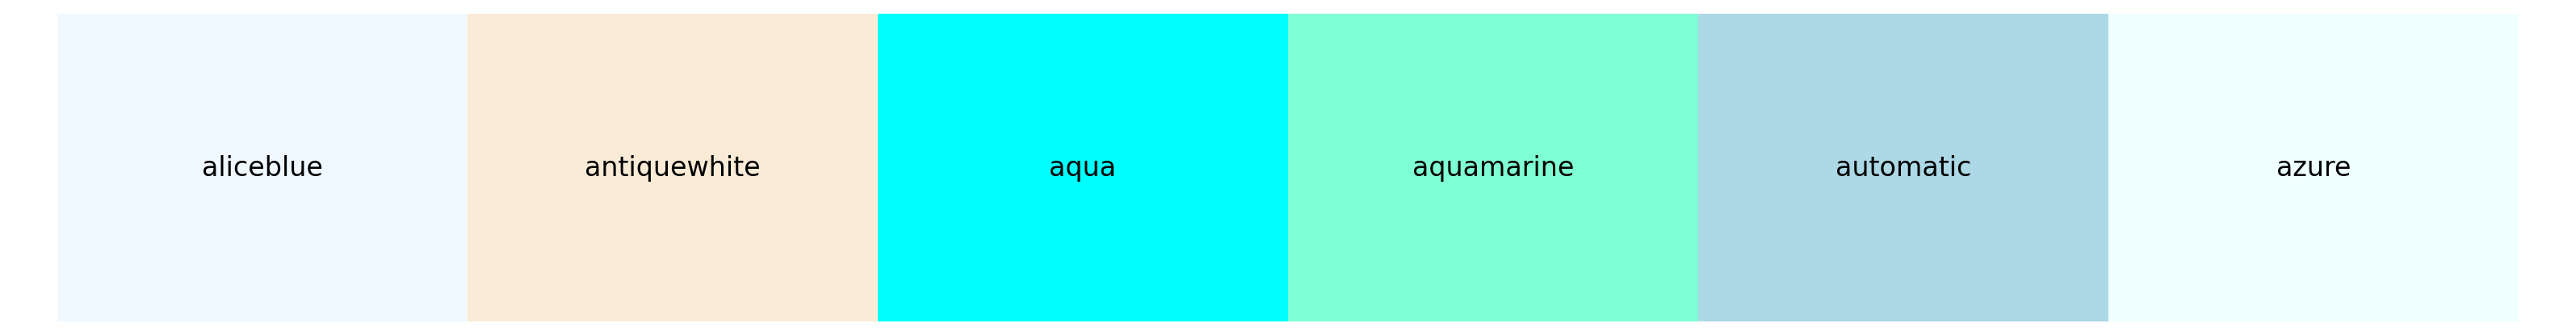

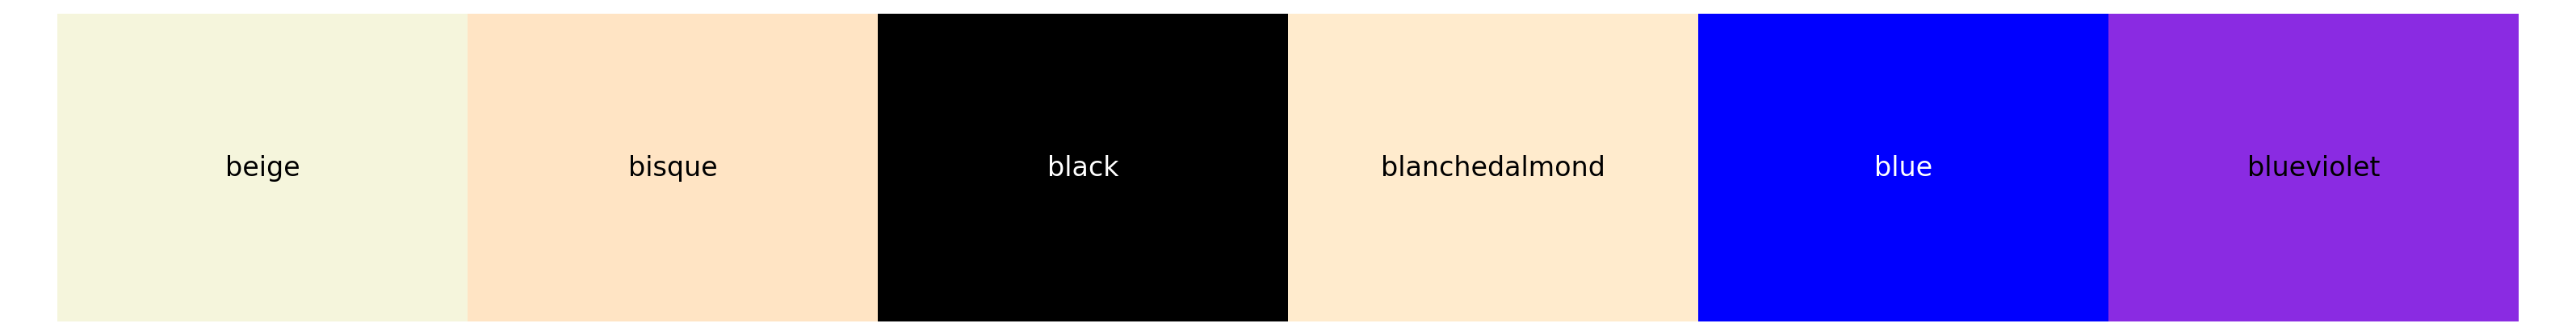

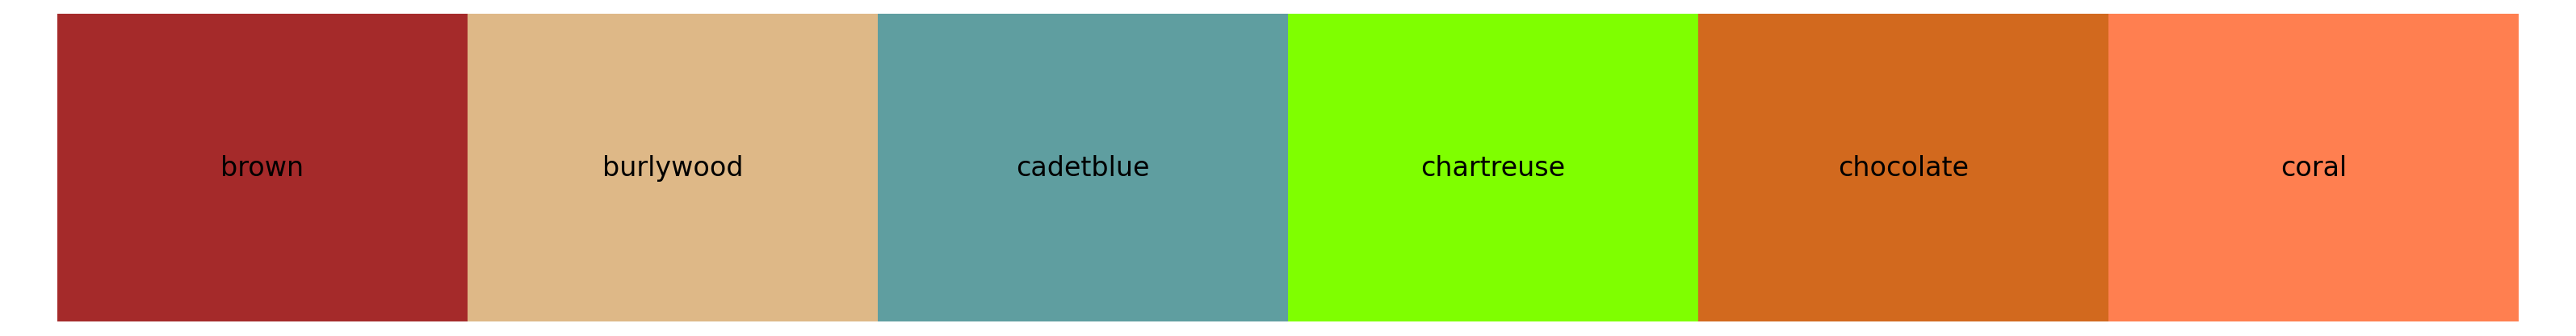

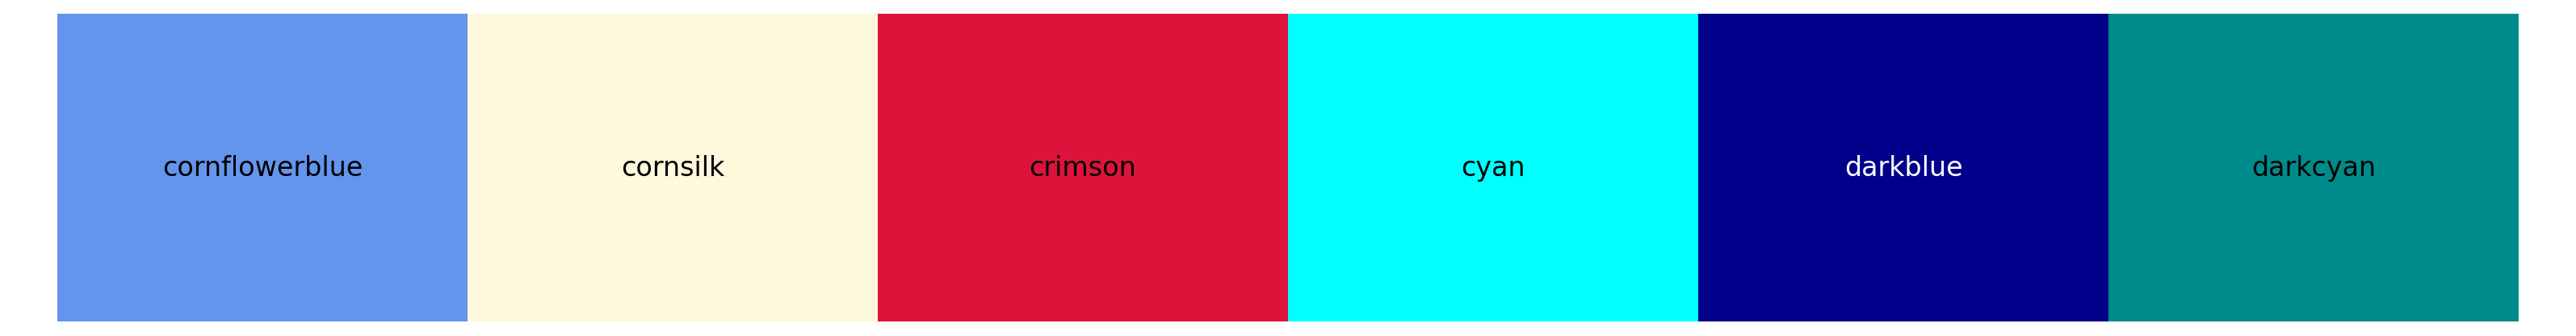

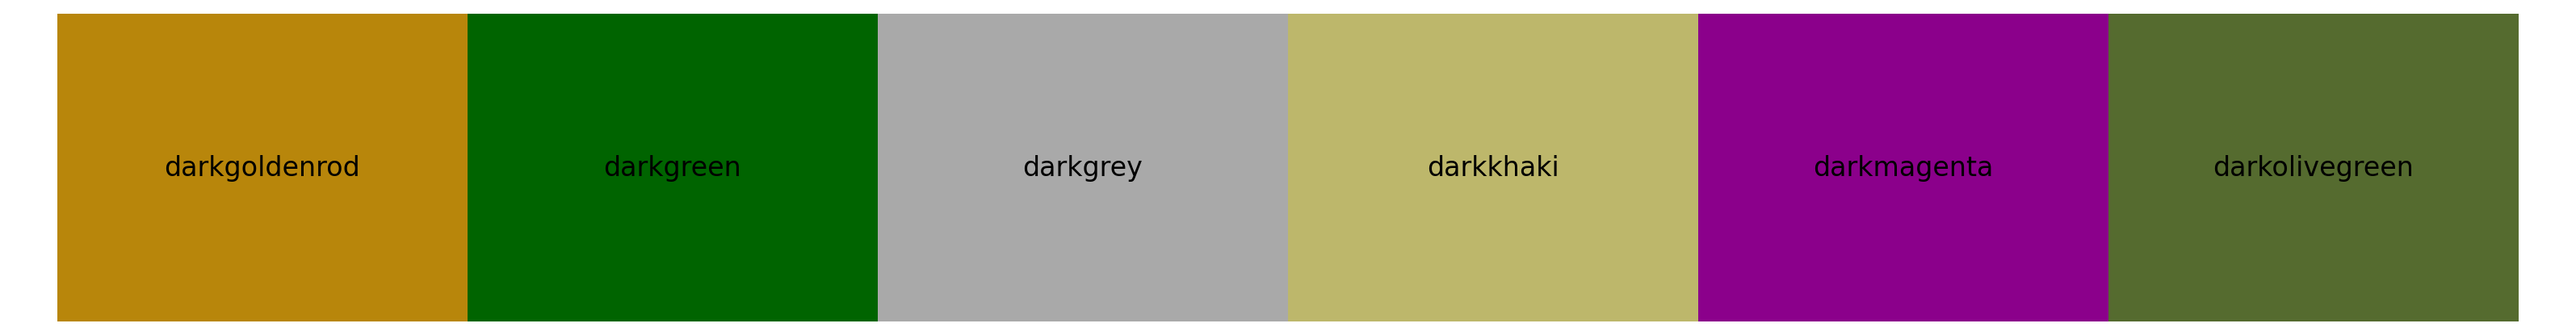

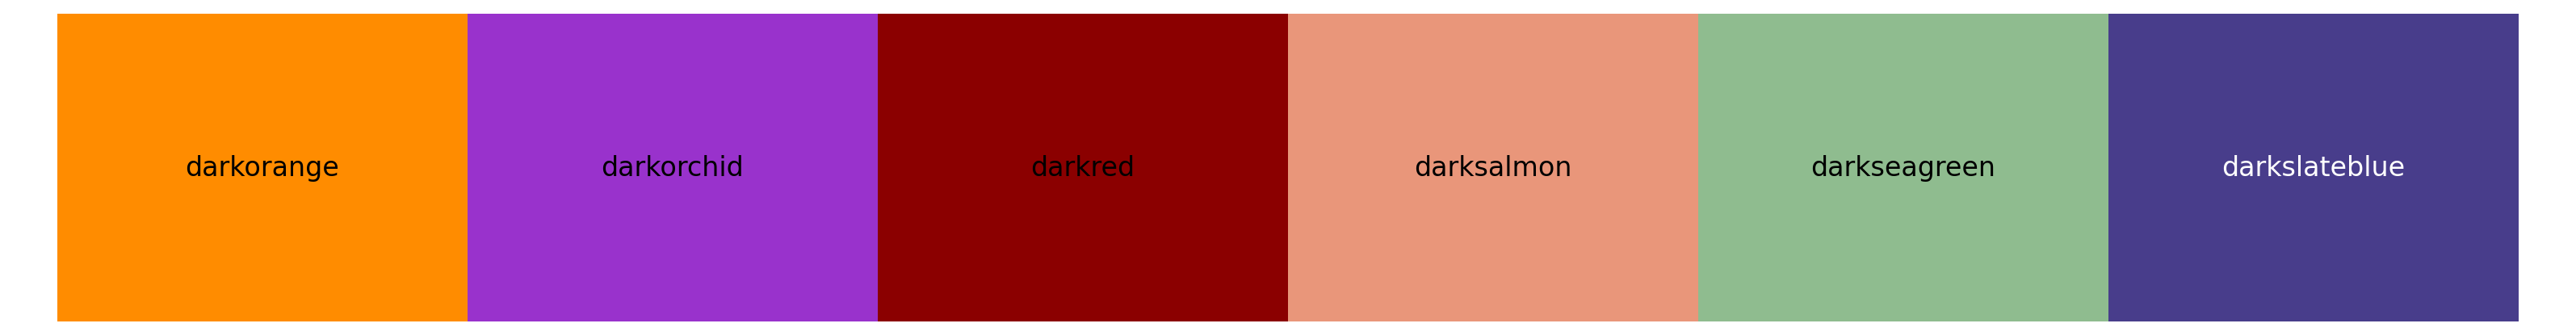

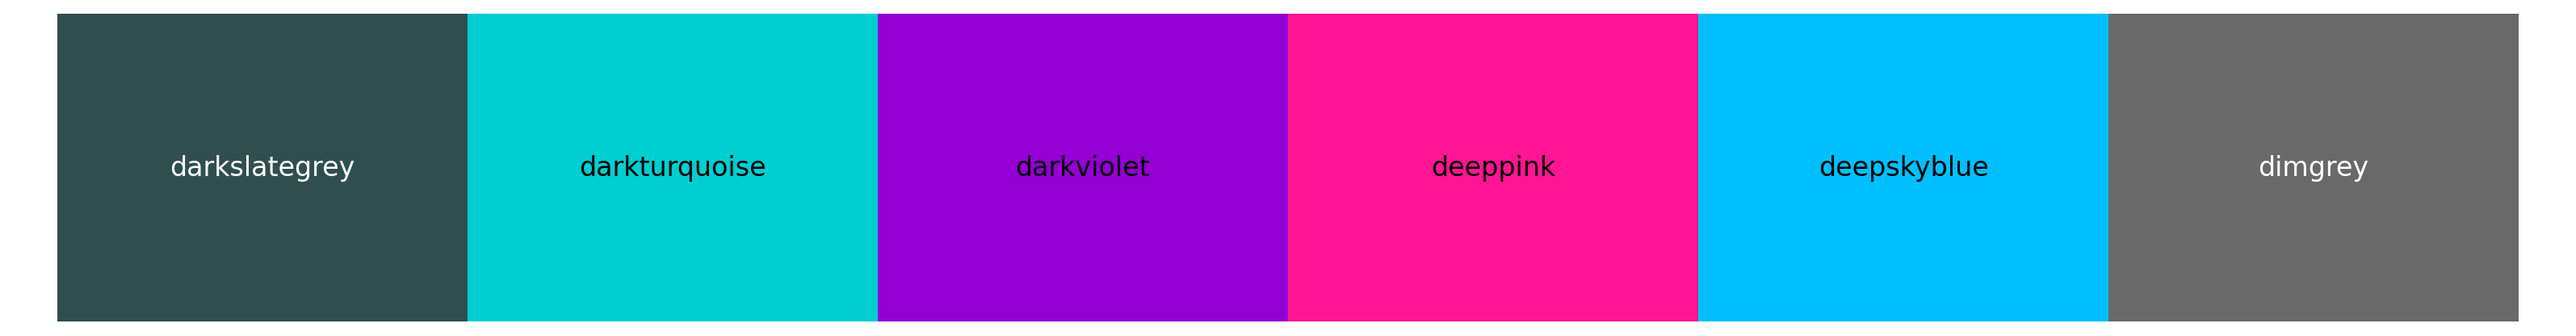

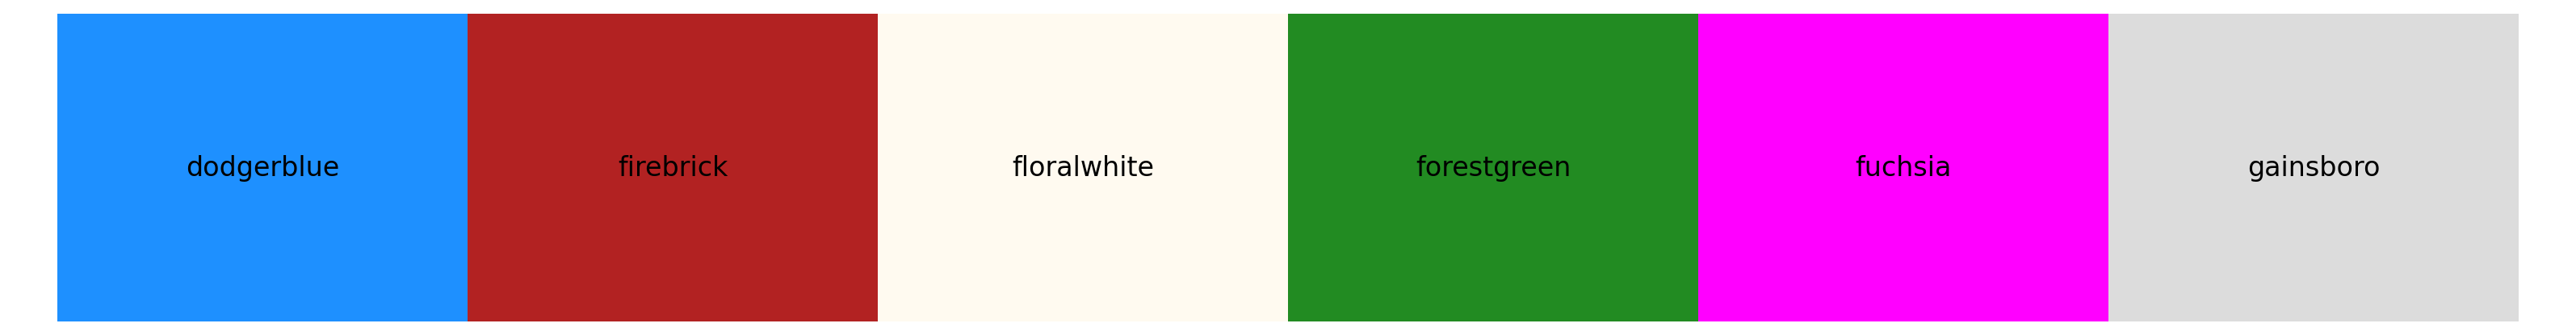

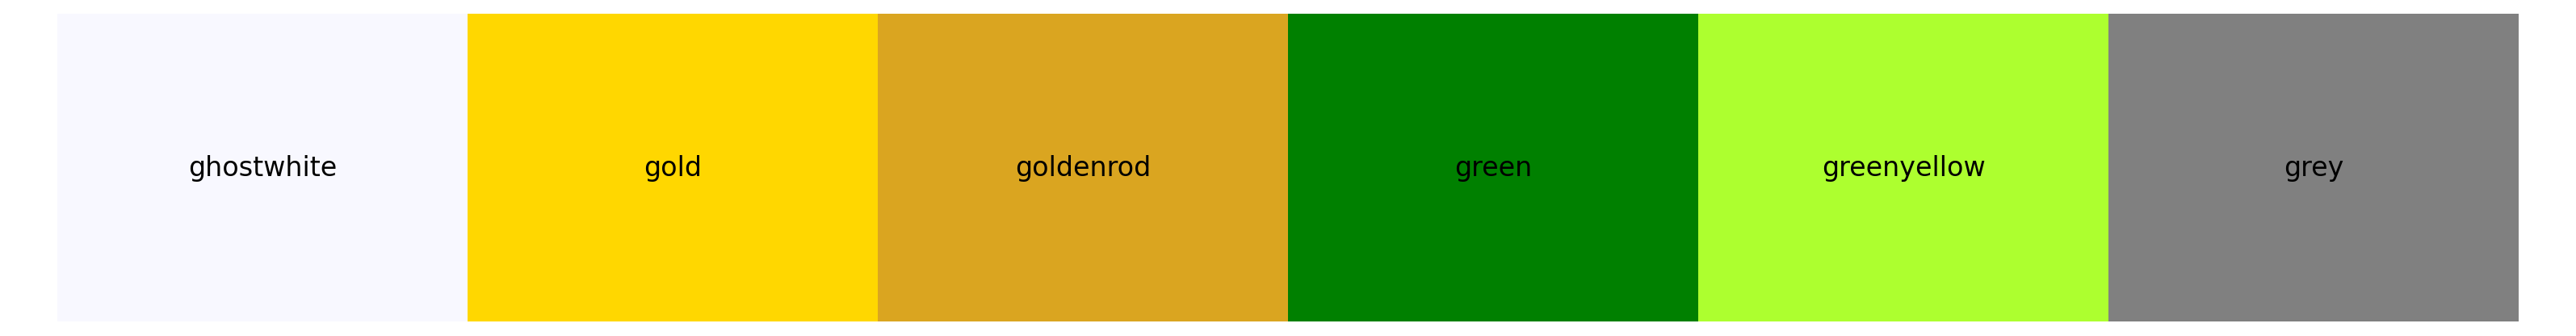

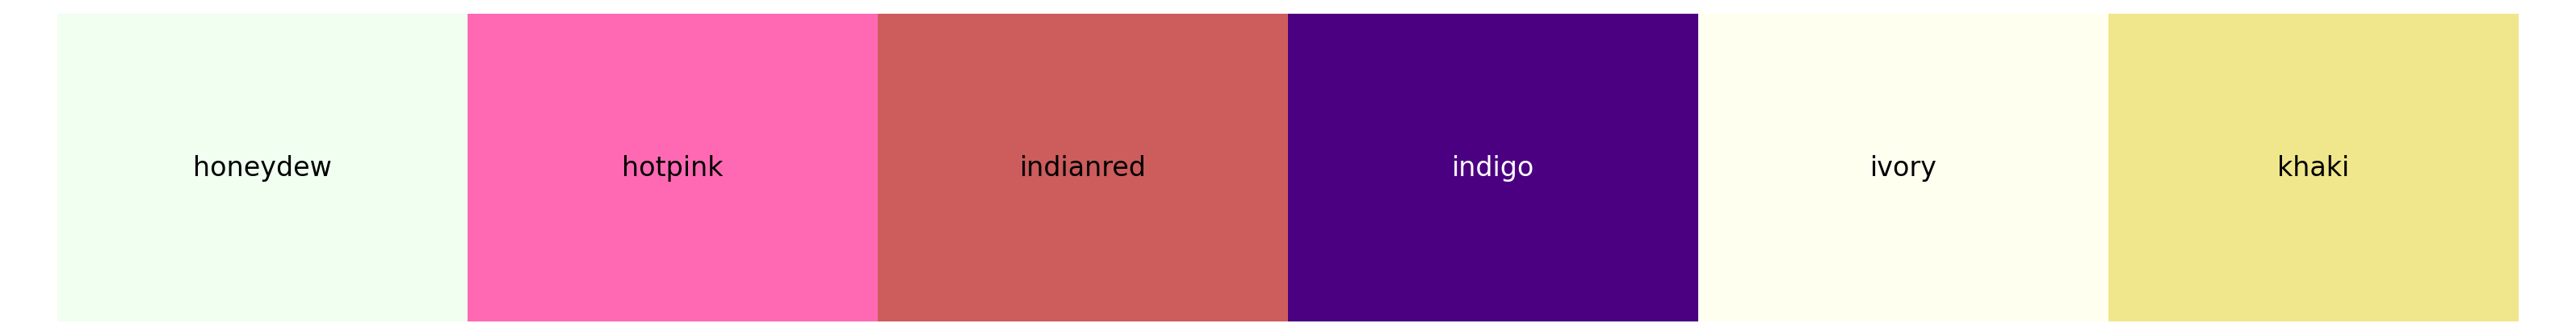

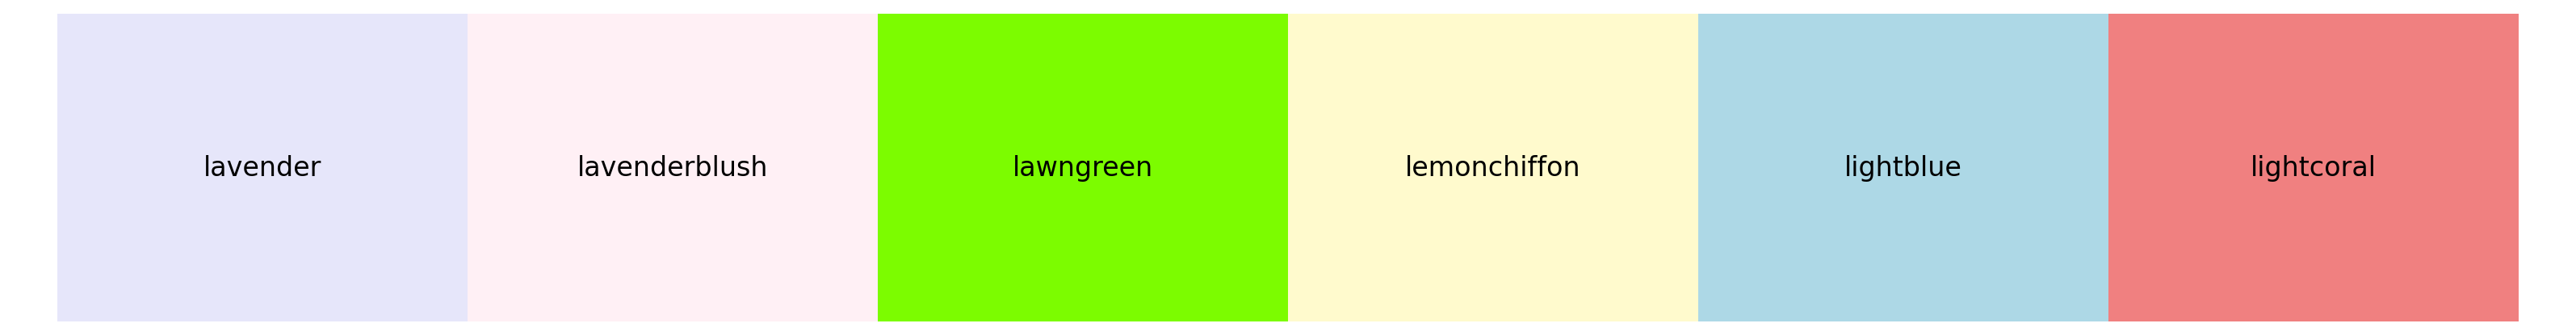

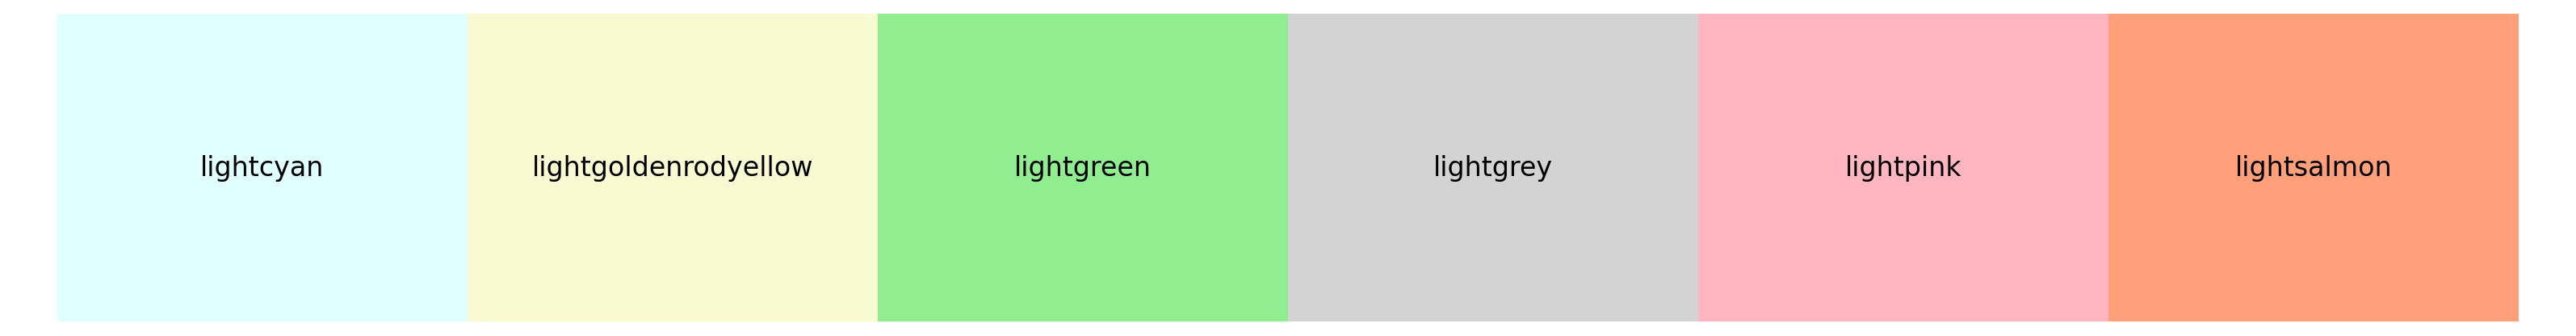

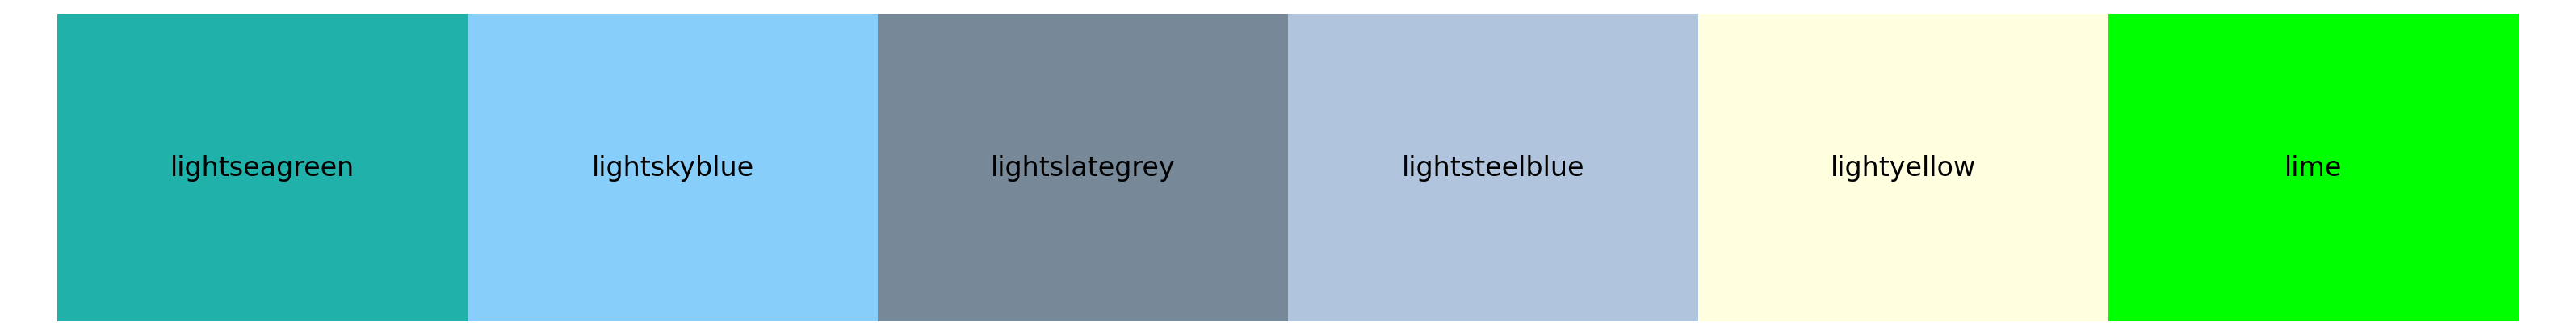

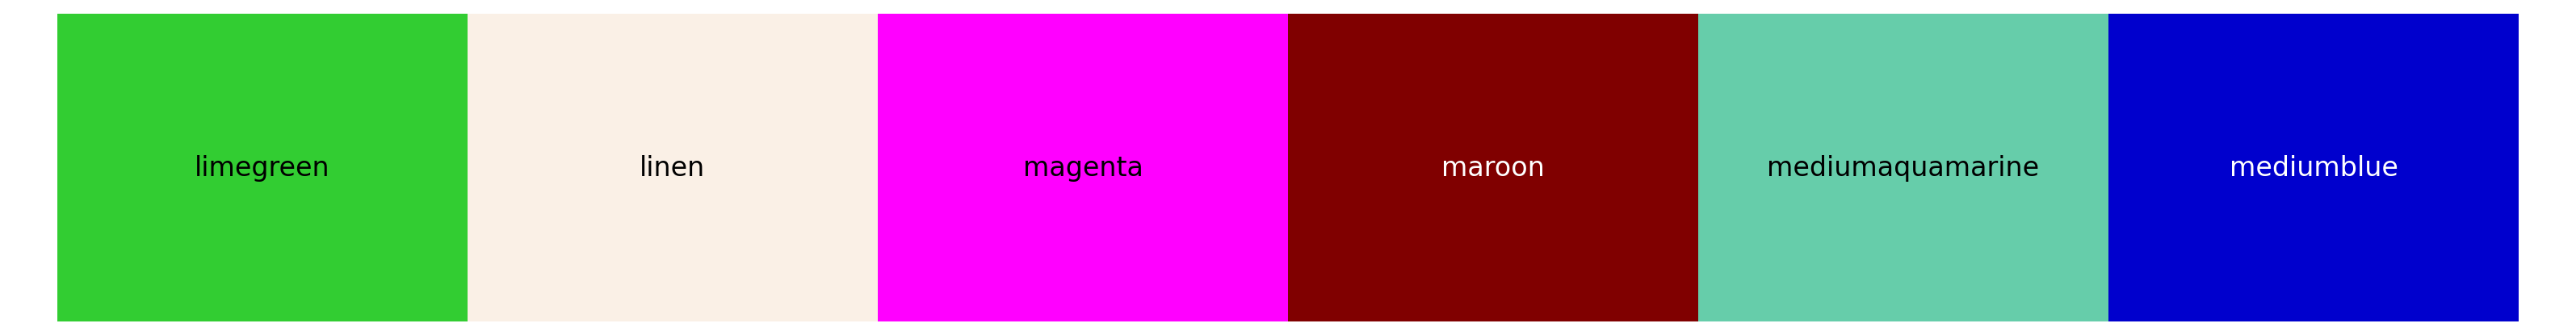

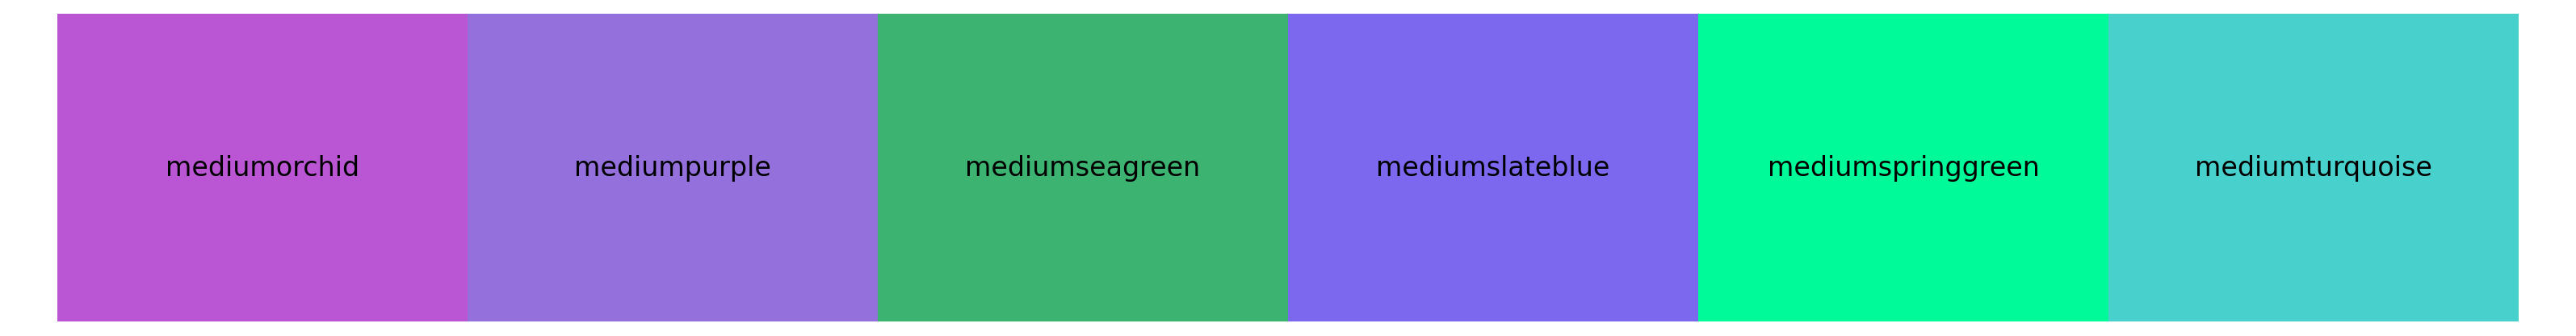

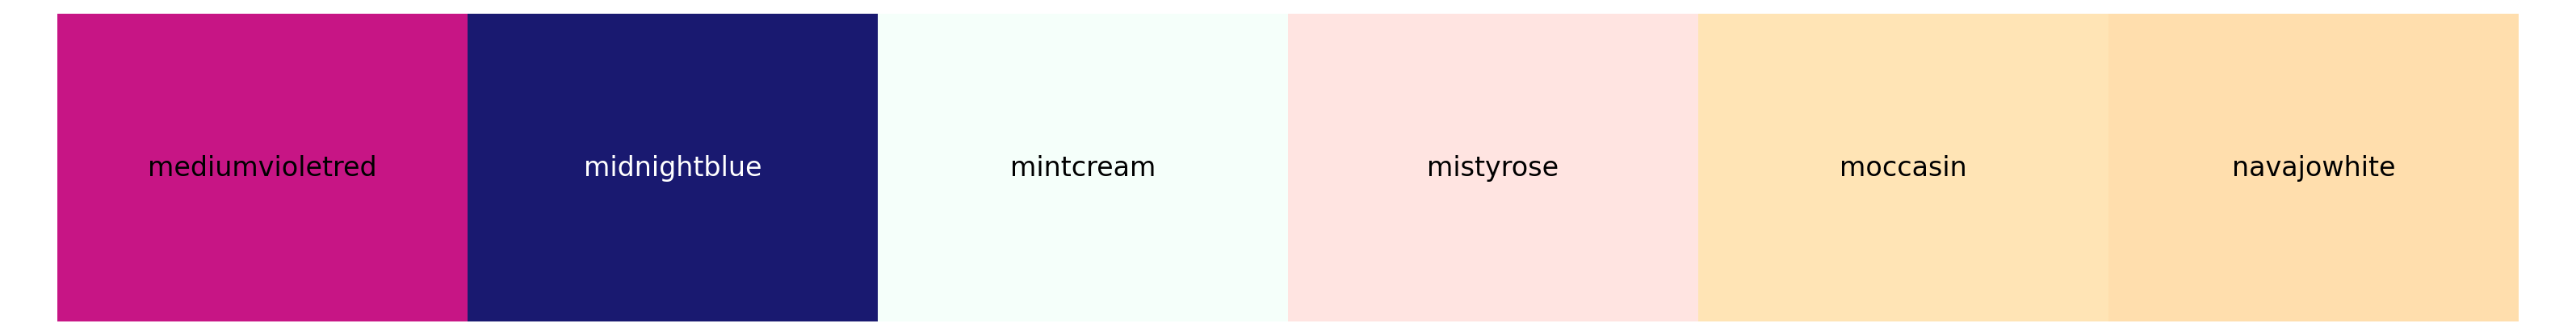

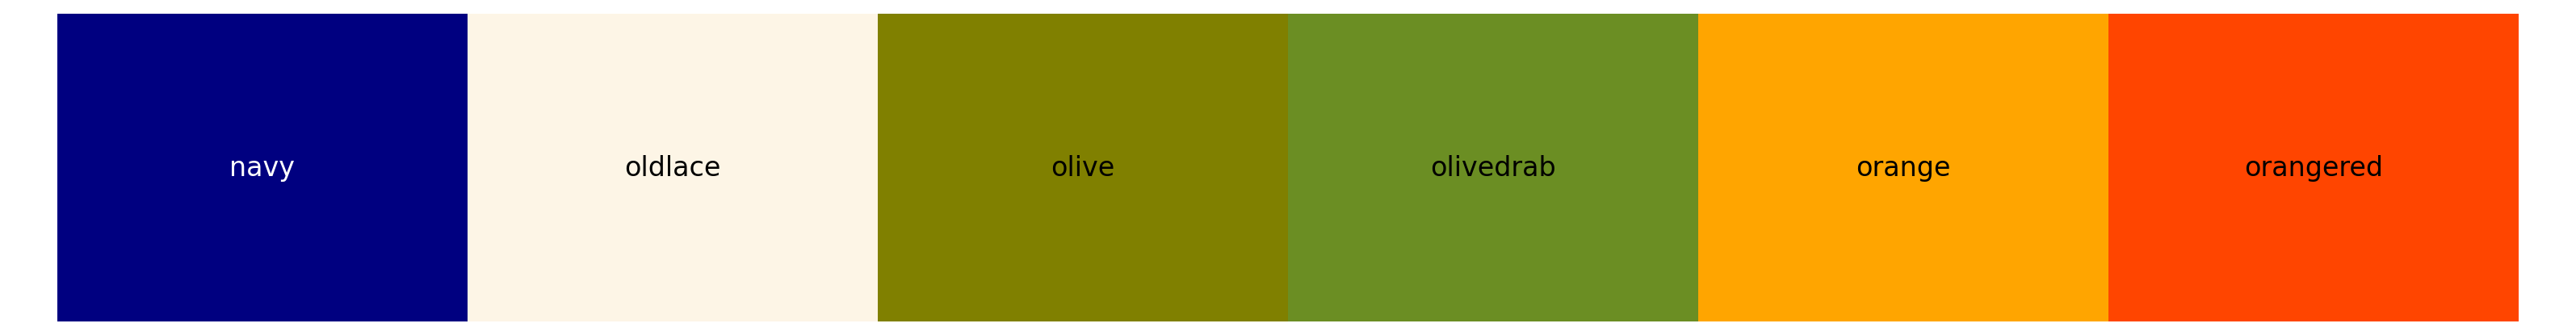

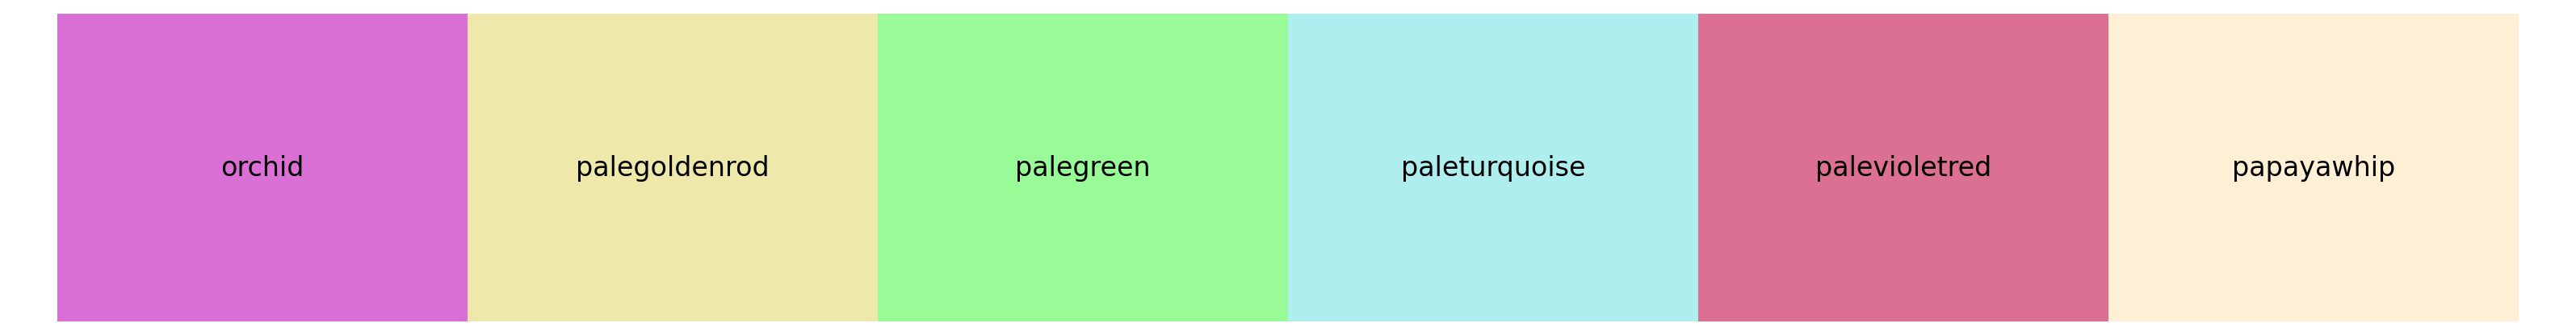

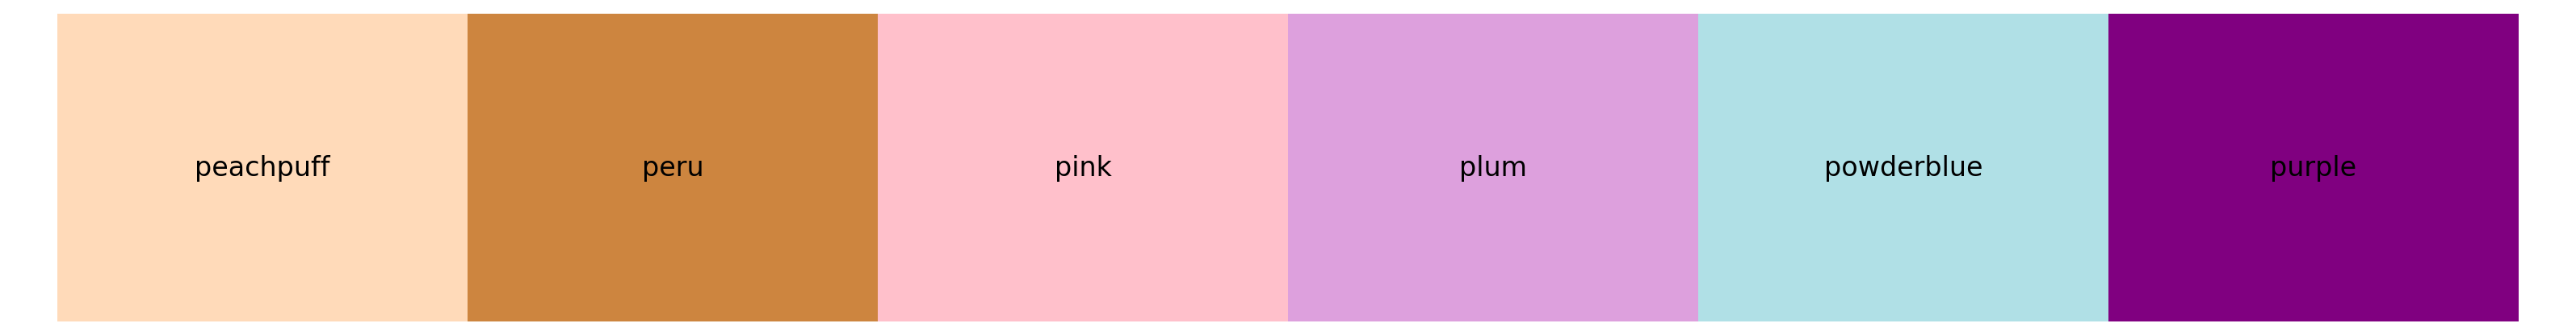

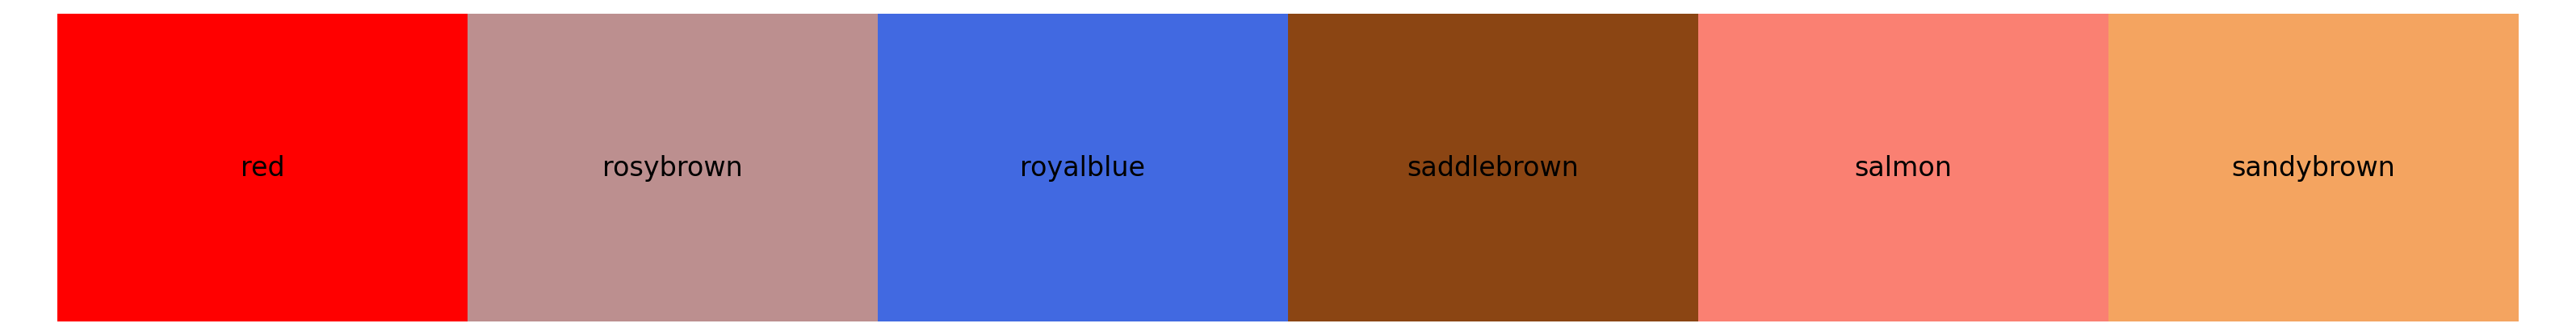

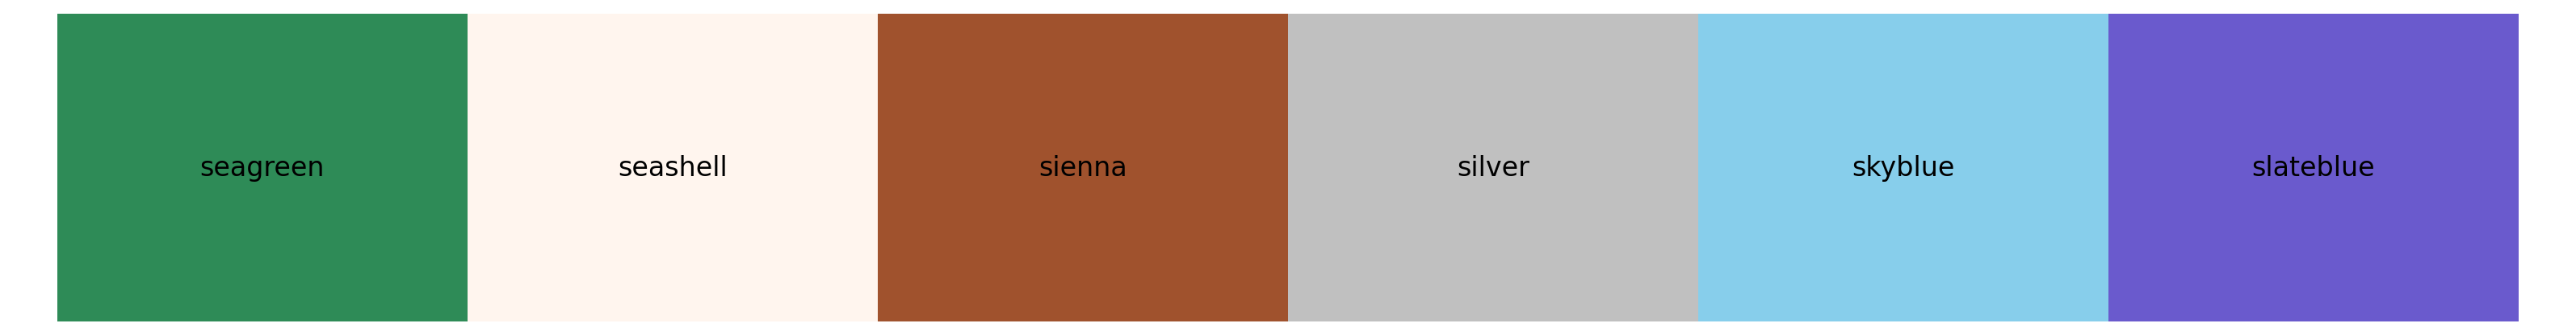

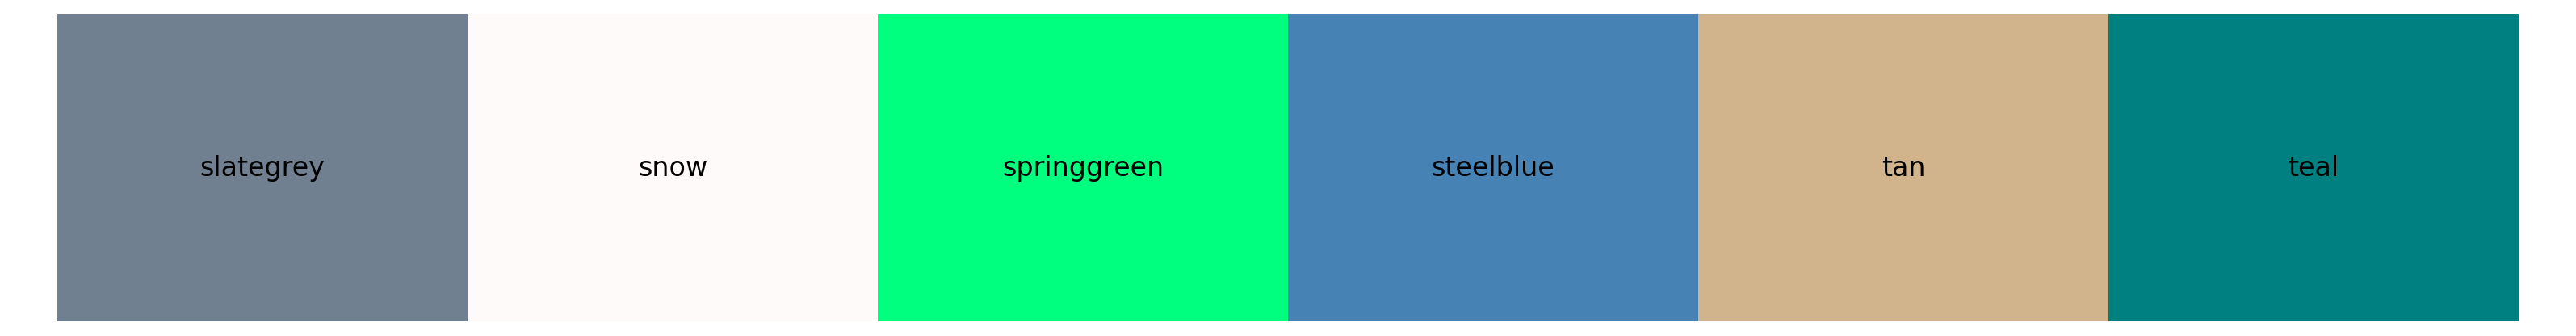

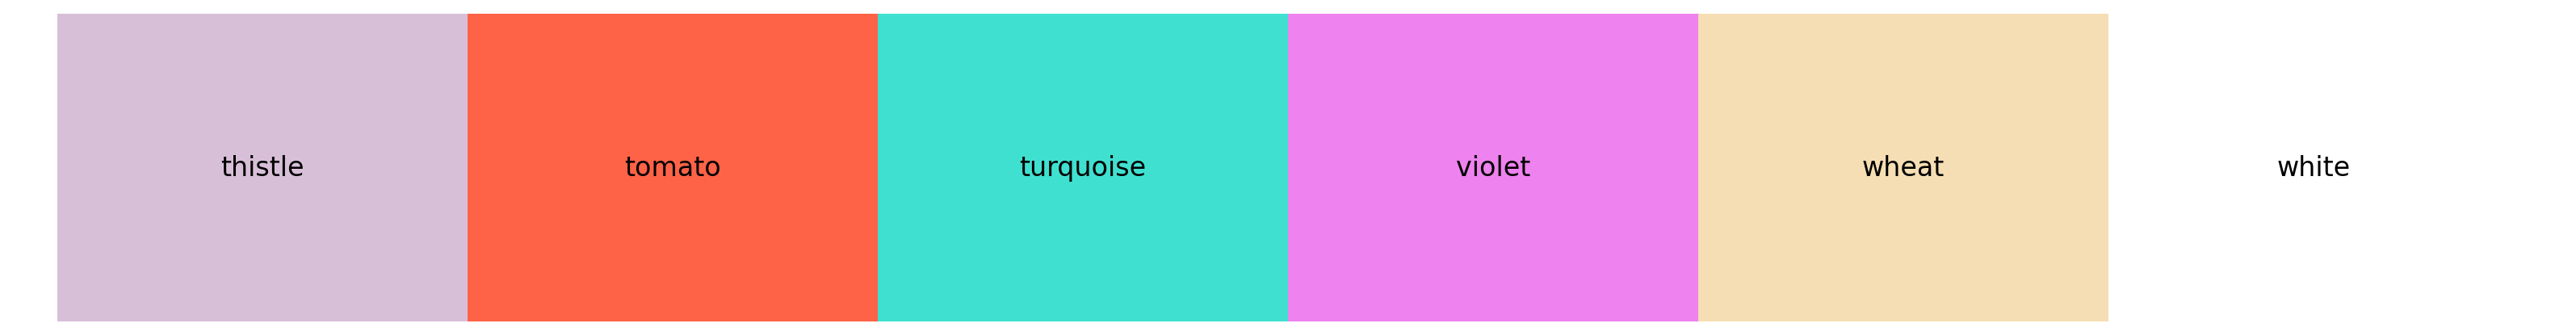

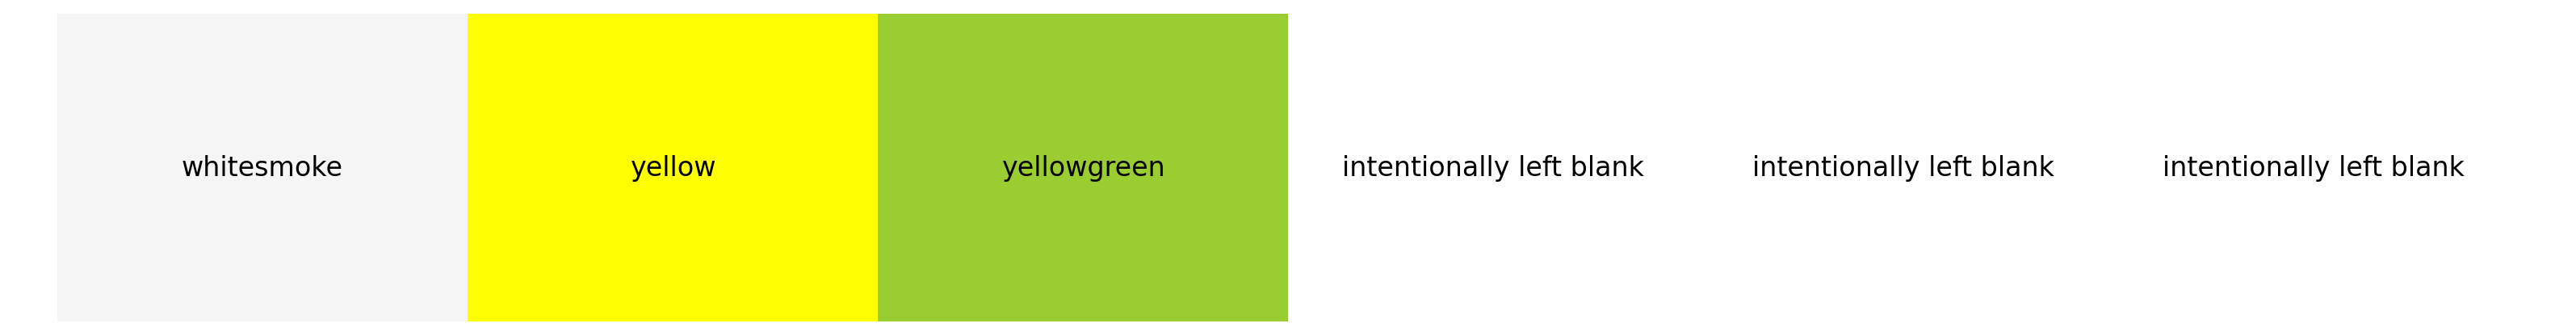

In [30]:
'''
Determining complementary colors works. But the result is unsatis-
factory. The use of HSV and HSL probably gives a better result.

See also:
doc.sagemath.org/html/en/reference/plotting/sage/plot/colors.html
stackoverflow.com/questions/40233986/python-is-there-a-function-or-formula-to-find-the-complementary-colour-of-a-rgb

def hvlv(a, b, c):
    lv = min(a,b,c)
    hv = max(a,b,c)
    lv = lv / 2
    hv = hv / 2
    return (hv + lv)

def color_complement(r, g, b):
    #k =1
    k = hvlv(r, g, b)
    return tuple(k - u for u in (r, g, b))


def map_col(refcol):
    from sage.plot.colors import rgbcolor
    a, b, c = rgbcolor(refcol)
    #a, b, c = 1-a, 1-b, 1-c
    a, b, c = color_complement(a, b, c)
    newcol = Color(a,b,c).html_color()
    return newcol
'''

def map_col(refcol):
    newcol = 'black' 
    comcol = {'black':         'white', 
              'blue':          'white',
              'darkblue':      'white',
              'darkslateblue': 'white',
              'darkslategrey': 'white', 
              'dimgrey':       'white',
              'indigo':        'white',
              'maroon':        'white',
              'mediumblue':    'white',
              'midnightblue':  'white',
              'navy':          'white',}
    for _, (k, v) in enumerate(comcol.items()):
        if k == refcol:
            newcol = v
    return newcol

def remove_double(color_list):
    double = ['darkgray', 'darkslategray', 'dimgray', 'gray',
              'lightgray', 'lightslategray', 'slategray']
    for e in double:
        color_list.remove(e)
    return color_list    
    
color_list = sorted(colors)
color_list = list(dict.fromkeys(color_list))
color_list=remove_double(color_list)

txtcol = 'black'
count = 0
num = int((len(color_list)/6).n())+1
for i in range(0, num):
    txtcol = map_col(color_list[count])
    a = polygon([(0,0), (0,1), (1,1), (1,0)], color=color_list[count], axes=False)
    a += text(color_list[count], (0.5,0.5), fontsize=24, color=txtcol)
    for j in range(1,6):
        try:
            txtcol = map_col(color_list[count+j])
            a += polygon([(0+j,0), (0+j,1), (1+j,1), (1+j,0)], color=color_list[count+j], axes=False)
            a += text(color_list[count+j], (0.5+j,0.5),fontsize=24, color=txtcol)
        except:
            a += polygon([(0+j,0), (0+j,1), (1+j,1), (1+j,0)], color='white', axes=False)
            a += text('intentionally left blank', (0.5+j,0.5),fontsize=24, color=txtcol)
    a.show(figsize=32, aspect_ratio=0.75)
    count+=6  